In [24]:
import tabula
from tabula import read_pdf
# If Error-realted pb: try to go to ~/.local/lib/python2.7/site-packages/tabula and uncomment the line 
#'from .errors import etc.' in the file wrapper.py

# Python could not find the file errors.py and interpret it as a module so I commented it, hoping that 
# those specific errors are not too important for us. 


import os
import pandas as pd
import tika
from tika import parser
import string
import pickle as pkl
import matplotlib.pyplot as plt
import re
import geopandas

In [8]:
def word_to_index(h):
    H=h
    for a in h:
        if a=='circoscrizione':
            H[h.index(a)]='circ'
        if a =='Coppieconfigli':
            H[h.index(a)]='ccf'
        if a == 'Coppiesenzafigli':
            H[h.index(a)]='csf'
        if a == 'Monogenitori':
            H[h.index(a)]='mono'
        if a == 'Personesole':
            H[h.index(a)]='ps'
        if a =='Altretipologie':
            H[h.index(a)]='at'
        if a=='Totalefamiglie':
            H[h.index(a)]='total'
    return H

In [50]:
#For years up to 2011
year=2011
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
    
for a,i in enumerate(df.iloc[0]):
    if len(i.split(' '))!=1:
        print zip(re.findall('[A-Z][a-z]*',header[a].replace(' ', '')),i.split(' '))
        df=df.join(pd.DataFrame(df[header[a]].str.split(' ',1).tolist(),
                                   columns = re.findall('[A-Z][a-z]*',header[a].replace(' ', ''))))
        df=df.drop(header[a],axis=1)

header=[t.replace(' ','') for t in df.columns]
header=word_to_index(header)
df.columns=header
df

circoscrizione 1
Coppie con figli 6.518
Coppie senza figliMonogenitori 5.374 4.079
Persone sole 23.296
Altre tipologie 3.415
Totale famiglie 42.682
[(u'Coppiesenzafigli', u'5.374'), (u'Monogenitori', u'4.079')]


,circ,ccf,ps,at,total,csf,mono
1,1,6.518,23.296,3.415,42.682,10.186,4.869
2,2,10.747,20.202,4.186,50.190,11.412,5.977
3,3,13.496,28.441,5.997,65.323,8.090,4.652
4,4,10.034,21.318,4.823,48.917,10.950,5.864
5,5,13.684,21.389,6.391,58.278,8.689,4.972
6,6,11.345,18.420,5.547,48.973,6.614,4.026
7,7,8.582,20.003,4.518,43.743,4.150,2.852
8,8,5.321,14.546,2.695,29.564,7.148,3.527
9,9,7.780,15.001,3.638,37.094,3.548,1.842
10,10,4.336,5.964,1.867,17.557,76.161,42.660


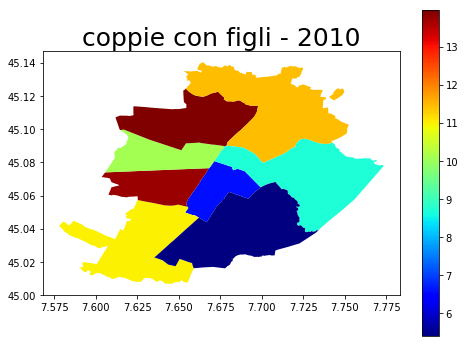

In [36]:
df_plot=geopandas.GeoDataFrame(df.drop(11).applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
ax=df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='jet', legend=True)
ax.axis='off'
ax.set_title('coppie con figli - 2010', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.savefig('CCF_2010.png')

In [20]:
os.listdir('.')

['Lagrange_Progetto',
 'todo',
 'sezioni_censimento_geo',
 'OICT',
 'Instalib.py',
 'OICT_script.ipynb',
 '.git',
 'typologies_families.ipynb',
 'ncp.py',
 'Plotter2.ipynb',
 'carta_sintesi_geo',
 'typo_famiglie',
 'matlab_export',
 'Instaplot.pyc',
 'zone_statistiche_geo',
 'TorInstagram_Git.ipynb',
 'questions_words.txt',
 'Untitled.ipynb',
 'Results',
 'Figures',
 'Twitter_scraping',
 'Housing_prices.ipynb',
 'models',
 'Plotter_py3.ipynb',
 'PKL_files',
 'Instalib.pyc',
 'microzone_censuarie_geo',
 'ncp.pyc',
 'posts_per_month',
 'replot',
 'trial_geo',
 'Instaplot.py',
 'Torino_data',
 '.ipynb_checkpoints',
 'Marseille_data',
 'Word2Vec_Instagram.ipynb',
 'CSF_2010.pdf',
 'circoscrizioni_geo',
 'Housing_prices',
 'Autocorrelations_old.ipynb',
 'Plotter.ipynb']

In [ ]:
#For years up to 2011
year=2011
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
    
for a,i in enumerate(df.iloc[0]):
    if len(i.split(' '))!=1:
        print zip(re.findall('[A-Z][a-z]*',header[a].replace(' ', '')),i.split(' '))
        df=df.join(pd.DataFrame(df[header[a]].str.split(' ',1).tolist(),
                                   columns = re.findall('[A-Z][a-z]*',header[a].replace(' ', ''))))
        df=df.drop(header[a],axis=1)

header=[t.replace(' ','') for t in df.columns]
header=word_to_index(header)
df.columns=header
df

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop(11).applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')

vmin, vmax= min(df_plot['ccf']),max(df_plot['ccf'])
print vmin, vmax
colors='pink'
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8), linewidth=1, edgecolor='black', color=(0,0,0,0))
#IP.heatmap_2(df_plot.dropna()[['ccf','geometry']],colors, smoothing=1)
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8),column='ccf'.format(i), markersize=100, ax=ax, cmap=colors,vmin=vmin,vmax=vmax)

ax.axis='off'
# add a title
ax.set_title('Coppie con figli - 2011', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Geoportale de Torino, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# add the colorbar to the figure
#cbar = plt.colorbar(sm,shrink=.5)

#IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
#
#plt.savefig(path+'Heatmaps/topic_dots_{}.pdf'.format(tvectors[i]))
#plt.savefig(path+'Heatmaps/topic_smoothed_otsu_{}.pdf'.format(tvectors[i]))

plt.show()
plt.close()

In [29]:
def to_int(text):
    if str(text).isalpha():
        return text
    else:
        return str(int(text))

In [30]:
def repair_data(trial, elements):
    tri=str(trial).split(' ')
    (a,b)=string.join(tri[0:2], ''), string.join(tri[2:],'')
    if b:
        if elements==2:
            return string.join([a,b],' ')
        if elements==1:
            return a+b
    else:
        return a

In [33]:
#For years after to 2012
year=2013
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.T
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]
df.rename(index=str, columns={'Tipologia':'Circoscrizione'},inplace=True)
df.columns=[d for d in df.columns[:-1]] + [header[-1]]
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        print i.split(' ')
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[j for j in i.split(' ')]).T
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)
df.index=[to_int(r) for r in df.index]
df.sort_index()

nan 1.0
Altre tipologie 5.079
Coppie con figli 6.343
Coppie senza figli 5.302
Monogenitori 3.959
Persone sole 23.217
Totale 43.9
[u'5', u'6']


,Altre tipologie,Coppie con figli,Coppie senza figli,Monogenitori,Persone sole,Totale
1,5.079,6.343,5.302,3.959,23.217,43.9
10,2.26,4.12,3.459,1.962,6.123,17.924
2,4.926,10.285,9.874,4.968,20.684,50.737
3,6.614,12.962,11.333,5.994,28.72,65.623
4,5.906,9.742,7.932,4.66,21.611,49.851
5,8.004,13.199,10.697,5.968,21.651,59.519
6,6.395,10.867,8.564,5.118,18.882,49.826
7,6.367,8.244,6.444,4.093,20.274,45.422
8,3.878,5.096,4.116,2.861,14.731,30.682
9,3.975,7.427,7.053,3.559,15.304,37.318


In [34]:
df.to_pickle('typo_famiglie/df_2013.pkl')

In [ ]:
df.columns=['at','ccf','csf','mono','ps','tot']

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')

In [ ]:
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']

In [ ]:
df_plot

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')



vmin, vmax= min(df_plot['ccf']),max(df_plot['ccf'])
print vmin, vmax
colors='pink'
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8), linewidth=1, edgecolor='black', color=(0,0,0,0))
#IP.heatmap_2(df_plot.dropna()[['ccf','geometry']],colors, smoothing=1)
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8),column='ccf'.format(i), markersize=100, ax=ax, cmap=colors,vmin=vmin,vmax=vmax)

ax.axis='off'
# add a title
ax.set_title('Coppie con figli - 2011', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Geoportale de Torino, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# add the colorbar to the figure
#cbar = plt.colorbar(sm,shrink=.5)

#IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
#
#plt.savefig(path+'Heatmaps/topic_dots_{}.pdf'.format(tvectors[i]))
#plt.savefig(path+'Heatmaps/topic_smoothed_otsu_{}.pdf'.format(tvectors[i]))

plt.show()
plt.close()

In [35]:
year=2014
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))

df=df.T

header=df.iloc[0]
df=df[1:]

df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]

df.dropna(inplace=True)
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
df=df.T
for col in df.columns:
    df[col]=df[col].apply(lambda x : repair_data(x,len(col.split(' '))))
df=df.T
df=df[['Altre tipologie', 'Coppie con figli', 'Coppie senza figli', 'Femmine sole', 'Maschi soli']]

for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        print i.split(' ')
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[str(j) for j in i.split(' ')]).T
        print df_add, df.columns
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)

df=df.T

df.T.sort_index().T

[u'5', u'6']
     0       1       2       3      4
5  855  12.936  10.508  12.348  9.558
6  487  10.608   8.400  10.130  8.812 Index([u'Altre tipologie', u'Coppie con figli', u'Coppie senza figli',
       u'Femmine sole', u'Maschi soli'],
      dtype='object')


,1,10,2,3,4,5,6,7,8,9,Totale
Altre tipologie,1.636,286,510,555,809,855,487,1.593,1.095,177,8.003
Coppie con figli,6.292,4.011,10.044,12.727,9.571,12.936,10.608,8.022,4.984,7.262,86.457
Coppie senza figli,5.255,3.408,9.776,11.113,7.792,10.508,8.400,6.385,4.094,6.919,73.650
Femmine sole,12.378,3.610,12.658,16.741,12.252,12.348,10.130,10.912,8.197,9.006,108.232
Maschi soli,11.342,2.598,7.964,12.080,9.430,9.558,8.812,9.442,6.432,6.317,83.975


In [38]:
def repair_data2(trial, elements):
    tri=str(trial).split(' ')
    (a,b)=tri[0], string.join(tri[1:],'')
    if b:
        if elements==2:
            return string.join([a,b],' ')
        if elements==1:
            return a+b
    else:
        return a

In [39]:
def to_int2(c):
    if not str(c).isalpha():
        return int(float(str(c)))
    else:
        return c

In [40]:
year=2015
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))

df=df.T

header=df.iloc[0]
df=df[1:]

df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]

df.dropna(inplace=True)
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
df=df.T
for col in df.columns:
    df[col]=df[col].apply(lambda x : repair_data2(x,len(str(col).split(' '))))
df=df.T
#df=df[['Altre tipologie', 'Coppie con figli', 'Coppie senza figli', 'Femmine sole', 'Maschi soli']]

for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[str(j) for j in i.split(' ')]).T
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)
df=df.T
df.columns=[to_int2(c) for c in df.columns]

In [41]:
df

,1,2,3,4,7,8,9,10,Totale,5,6
Altre tipologie,1.562,494,582,865.0,1.721,1.177,185,283.0,8.535,1.099,567
Coppie con figli,6.127,9.851,12.429,9.372,7.804,4.855,7.112,3.921,84.384,12.549,10.364
Coppie con figli e altri componenti,47,59,91,106.0,155.0,39,73,32.0,966,164,200
Coppie con figli e parenti,239,348,533,434.0,498.0,206,360,238.0,4.404,751,797
"Coppie con figli, parenti e altri componenti",11,16,30,25.0,43.0,10,25,14.0,308,53,81
Coppie senza figli,5.257,9.525,10.859,7.662,6.222,4.072,6.758,3.333,72.410,10.426,8.296
Coppie senza figli con altri componenti,33,40,54,61.0,56.0,30,46,14.0,464,78,52
Coppie senza figli con paren. e altri componenti,4,4,9,6.0,4.0,4,7,1.0,60,8,13
Coppie senza figli con parenti,76,160,182,141.0,123.0,73,114,83.0,1.366,225,189
Femmine sole,12.365,12.746,16.677,12.213,10.841,8.218,8.966,3.637,108.000,12.270,10.067


In [43]:
def to_int3(x):
    if x-int(x)!=0:
        return int(x*1000)
    else:
        return int(x)

In [44]:
year=2016
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
df=df.T.dropna().T
df.applymap(to_int3)

,1,2,3,4,5,6,7,8,Totale
Tipologia Famiglia,,,,,,,,,
Altre tipologie,1681,935,715,1160,1240,780,1970,1537,10017
Coppie con figli,6023,13442,12030,9052,12120,9992,7518,11600,81778
Coppie con figli e altri componenti,54,99,95,119,169,194,139,117,986
Coppie con figli e parenti,223,560,471,414,707,749,442,507,4073
"Coppie con figli, parenti e altri compon",9,31,28,24,46,76,55,45,314
Coppie senza figli,5289,12674,10770,7617,10310,8244,6149,10735,71791
Coppie senza figli con altri componenti,37,59,52,65,88,69,59,86,515
Coppie senza figli con paren. e altri co,2,4,12,7,14,12,2,11,64
Coppie senza figli con parenti,71,242,189,136,203,192,125,185,1343


In [45]:
df.to_pickle('typo_famiglie/df_2016.pkl')

In [46]:
year=2016
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
df=df.T.dropna().T
df.applymap(to_int3)
df=df.T

In [31]:
df_circ.set_index('NCIRCO')['geometry']

NCIRCO
1    POLYGON ((1394020.6658 4989395.456, 1394104.85...
2    POLYGON ((1388021.1388 4988598.7439, 1388221.1...
3    POLYGON ((1390109.823 4991844.4928, 1390162.00...
5    POLYGON ((1390819.53 4995807.741, 1390884.5608...
6    (POLYGON ((1400961.327 4997011.560000001, 1401...
7    POLYGON ((1395455.966 4992801.3908, 1395512.19...
8    POLYGON ((1392566.3958 4986473.023, 1392582.64...
4    POLYGON ((1390275.648 4992144.6129, 1390279.03...
Name: geometry, dtype: object

/home/eartiges/.local/lib/python2.7/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


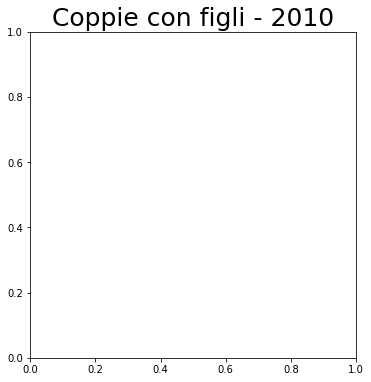

In [29]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
ax=df_plot.dropna().to_crs(epsg=4326).plot(column='Coppie con figli',cmap='jet')
ax.axis='off'
ax.set_title('Coppie con figli - 2016', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.savefig('CCF_2016.pdf')

In [48]:
year=2017
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
#df=df.T.dropna().T
#df.applymap(to_int3)
df=df.rename(columns={'Unnamed: 0':'tipo'}).set_index('tipo').dropna(axis=1)

In [49]:
df.to_pickle('typo_famiglie/df_2017.pkl')